In [2]:
import numpy as np 
from sympy import symbols, exp, integrate
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve
import scipy.constants as consts
from scipy.integrate import quad
import sys



In [3]:
df_Dwinelle = pd.read_csv('Spectrum_Dwinelle_Radiation_Project.csv')
df_Etcheverry = pd.read_csv('Spectrum_Etcheverry_Radiation_Project.csv')
df_Evans = pd.read_csv('Spectrum_Evans_Radiation_Project_Full.csv')
df_Hearst = pd.read_csv('Spectrum_Hearst_Radiation_Project.csv')
df_Moffit = pd.read_csv('Spectrum_Moffitt_Radiation_Project_Full.csv')
df_Waywest = pd.read_csv('Spectrum_WayWest_Radiation_Project_Full.csv')

df_Dwinelle = df_Dwinelle.iloc[-1]
df_Etcheverry = df_Etcheverry.iloc[-1]
df_Evans = df_Evans.iloc[-1]
df_Hearst = df_Hearst.iloc[-1]
df_Moffit = df_Moffit.iloc[-1]
df_Waywest = df_Waywest.iloc[-1]

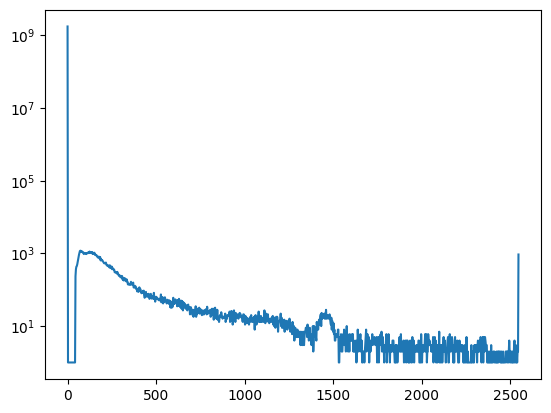

In [33]:
#Calibrating Energy per Width by dividing 1460 keV by the bin that the peak is in
bins = df_Dwinelle.iloc[550:620]
bin = np.argmax(bins)
bin = bin + 550
energy_per_bin = 1460 / bin
calibrated_energy = np.arange(0, len(df_Dwinelle)) * energy_per_bin
plt.plot(calibrated_energy, df_Dwinelle)
plt.yscale('log')
plt.show()


$$\text{Dwinelle}$$

Text(0.5, 1.0, 'Energy vs. Counts')

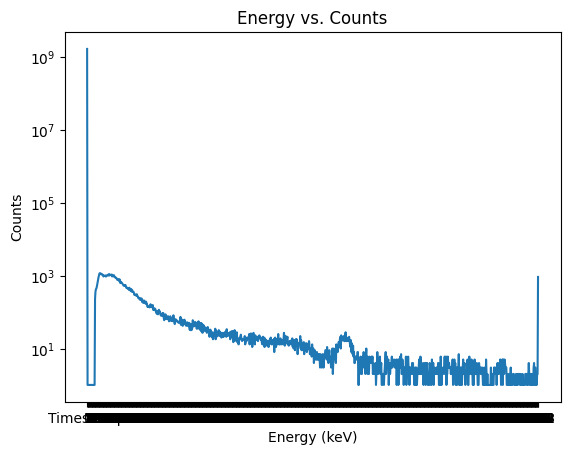

In [468]:
plt.plot(df_Dwinelle)
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Energy vs. Counts')

maxvalues = 3.6317528370442305
for gaussian : amplitude = 3.6317528370442305, mean = 2.000000000675578, std = 1.0852023433982971
for exponential : a = 2.198734731523216, b = -0.0460737438267473
Intersection points: [0.87021383 3.23830496]
Definite integral = -4.7389463057253 + 4.03625649684656*sqrt(pi)
Total counts for U238 is : 2.4263793430524574 = 3 counts


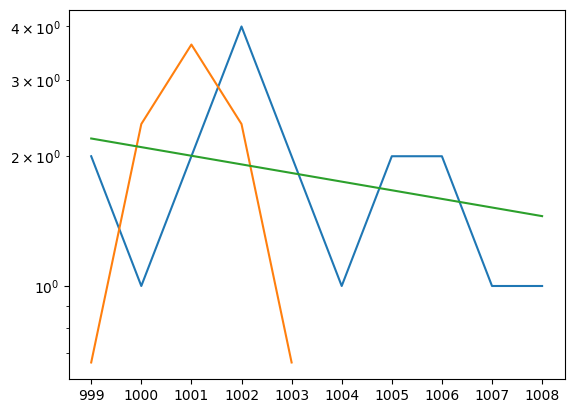

In [486]:
#Energy Peak for U238 is 1001 keV
df_Dwinelle_U238 = df_Dwinelle.iloc[1000:1010] #This chunk of data is for exponential fit
df_Dwinelle_U238_gaussian = df_Dwinelle.iloc[1001:1006] #This chunk of data is for gaussian fit
plt.plot(df_Dwinelle_U238)
plt.yscale('log')

#Gausian Fit --> Exponential Fit --> intersection --> integration
#Gaussian Fit
Dwinelle_U238_values = df_Dwinelle_U238_gaussian.values
Dwinelle_U238_values = Dwinelle_U238_values.flatten()
Dwinelle_U238_index = df_Dwinelle_U238_gaussian.index
Dwinelle_U238_index = np.arange(len(Dwinelle_U238_values))

std = np.std(df_Dwinelle_U238_gaussian.values)
mean = np.mean(df_Dwinelle_U238_gaussian.values)

def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Dwinelle_U238_index, Dwinelle_U238_values, p0 = initial_guess)
amplitude_fit, mean_fit, stddev_fit = params

plt.plot(Dwinelle_U238_index, gaussian(Dwinelle_U238_index, amplitude_fit, mean_fit, stddev_fit))

max_value = gaussian(mean_fit, amplitude_fit, mean_fit, stddev_fit)
print(f'maxvalues = {max_value}')

#Exponential Fit
Dwinelle_U238_exponential_values = df_Dwinelle_U238.values
Dwinelle_U238_exponential_values = Dwinelle_U238_exponential_values.flatten()
Dwinelle_U238_exponential_index = df_Dwinelle_U238.index
Dwinelle_U238_exponential_index = np.arange(len(Dwinelle_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exponential_func, Dwinelle_U238_exponential_index, Dwinelle_U238_exponential_values)
a, b = params
plt.plot(Dwinelle_U238_exponential_index, exponential_func(Dwinelle_U238_exponential_index, a, b))

#Intersection
print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
print(f'for exponential : a = {a}, b = {b}')

def f(x, amplitude_fit, mean_fit, stddev_fit):
    return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)

def g(x, a, b):
    return a * np.exp(b * x)

def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
    return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)

x_values = np.linspace(-10, 10, 1000)

sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]

intersection_points = []
for idx in sign_changes:
    x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
    intersection_points.extend(x_root)

intersection_points = np.unique(intersection_points)

print("Intersection points:", intersection_points)

#Integrate
x = symbols('x')
f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
f_exponential = a * exp(b * x)

lower_bound = intersection_points[0]
upper_bound = intersection_points[1]

definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential

print(f'Definite integral = {definite_integral}')

print(f'Total counts for U238 is : {4.04260209376798 * np.sqrt(consts.pi) - 4.7389463057253} = 3 counts')


Activity = 319.14998868603567 Bq/min
max_point = 6.0


C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\2952709513.py:34: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\2952709513.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intersection_point = int(intersection_point)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\2952709513.py:55: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))


number of counts for Cs137 = 267.299288697668


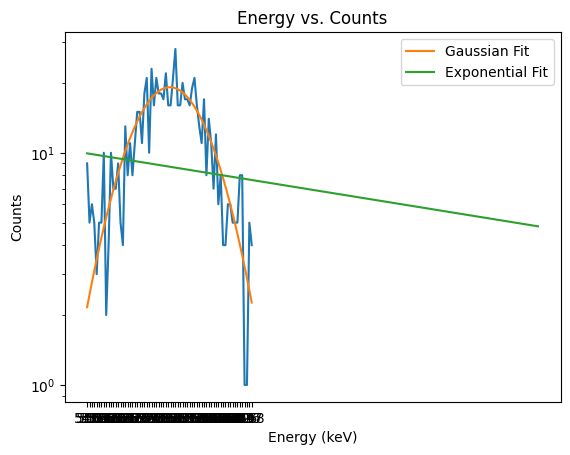

In [489]:
#Energy Peak for Cs-137 is 662 keV
df_Dwinelle_Cs137 = df_Dwinelle[510: 700] #Extra points to better fit the exponential curve
df_Dwinelle_Cs137_gaussian = df_Dwinelle[550:620] #The gaussian curve itself
plt.plot(df_Dwinelle_Cs137_gaussian)

#Gaussian Fit
Dwinelle_Cs137_gaussian_index = df_Dwinelle_Cs137_gaussian.index
Dwinelle_Cs137_gaussian_index = np.arange(len(Dwinelle_Cs137_gaussian_index))
Dwinelle_Cs137_gaussian_values = df_Dwinelle_Cs137_gaussian.values
Dwinelle_Cs137_gaussian_values = Dwinelle_Cs137_gaussian_values.flatten()

std = np.std(Dwinelle_Cs137_gaussian_values)
mean = np.mean(Dwinelle_Cs137_gaussian_values)

def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Dwinelle_Cs137_gaussian_index, Dwinelle_Cs137_gaussian_values, p0 = initial_guess)
amplitude, mean, std = params

plt.plot(Dwinelle_Cs137_gaussian_index, gaussian(Dwinelle_Cs137_gaussian_index, amplitude, mean, std), label = 'Gaussian Fit')

max_value = gaussian(mean, amplitude, mean, std)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')

#Exponential Fit
Dwinelle_Cs137_index = df_Dwinelle_Cs137.index
Dwinelle_Cs137_index = np.arange(len(Dwinelle_Cs137_index))
Dwinelle_Cs137_values = df_Dwinelle_Cs137.values
Dwinelle_Cs137_values = Dwinelle_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)

params, covariance = curve_fit(exponential_func2, Dwinelle_Cs137_index, Dwinelle_Cs137_values)
a, b = params
plt.plot(Dwinelle_Cs137_index, exponential_func2(Dwinelle_Cs137_index, a, b), label = 'Exponential Fit')
plt.yscale('log')

max_point = Dwinelle_Cs137_values[0]
print(f'max_point = {max_point}')
#Intersection
def f(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

def g(x, a, b):
    return a * np.exp(-b * x)

def intersection_function(x, amplitude, mean, std, a, b):
    return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)

intersection_points = []
for i in range(len(Dwinelle_Cs137_index)):
    intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
    intersection_point = int(intersection_point)
    intersection_points.append(intersection_point)

intersection_points = np.array(intersection_points)
intersection_points = intersection_points[intersection_points < 100]
intersection_points = np.unique(intersection_points)

#Integration
x = symbols('x')
f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
f_exponential = a * exp(-b * x)

lower_bound = intersection_points[0]
upper_bound = intersection_points[1]

#definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))  Integral is unsolvable. 
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
#definite_integral = definite_integral_gaussian - definite_integral_exponential

def integrand(x):
    return np.exp(0.125786623123295 * x) * np.exp(-0.00181337453702553 * x**2)

result, error = quad(integrand, lower_bound, upper_bound)

# Multiply the result by the constant and subtract the other constant
definite_integral = 2.16175471677203 * result - definite_integral_exponential

print(f'number of counts for Cs137 = {definite_integral}')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Energy vs. Counts')
plt.legend()



In [490]:
def Dwinelle(exponential_range, gaussian_range):
    
    df_Dwinelle_Cs137 = df_Dwinelle[exponential_range] #Extra points to better fit the exponential curve
    df_Dwinelle_Cs137_gaussian = df_Dwinelle[gaussian_range] #The gaussian curve itself
    plt.plot(df_Dwinelle_Cs137_gaussian)

    Dwinelle_Cs137_gaussian_index = df_Dwinelle_Cs137_gaussian.index
    Dwinelle_Cs137_gaussian_index = np.arange(len(Dwinelle_Cs137_gaussian_index))
    Dwinelle_Cs137_gaussian_values = df_Dwinelle_Cs137_gaussian.values
    Dwinelle_Cs137_gaussian_values = Dwinelle_Cs137_gaussian_values.flatten()

    std = np.std(Dwinelle_Cs137_gaussian_values)
    mean = np.mean(Dwinelle_Cs137_gaussian_values)

    def gaussian(x, amplitude, mean, std):
        return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

    initial_guess = (1, mean, std)
    params, covariance = curve_fit(gaussian, Dwinelle_Cs137_gaussian_index, Dwinelle_Cs137_gaussian_values, p0 = initial_guess)
    amplitude, mean, std = params

    plt.plot(Dwinelle_Cs137_gaussian_index, gaussian(Dwinelle_Cs137_gaussian_index, amplitude, mean, std))

    Dwinelle_Cs137_index = df_Dwinelle_Cs137.index
    Dwinelle_Cs137_index = np.arange(len(Dwinelle_Cs137_index))
    Dwinelle_Cs137_values = df_Dwinelle_Cs137.values
    Dwinelle_Cs137_values = Dwinelle_Cs137_values.flatten()
    def exponential_func2(x, a, b):
        return a * np.exp(-b * x)

    params, covariance = curve_fit(exponential_func2, Dwinelle_Cs137_index, Dwinelle_Cs137_values)
    a, b = params
    plt.plot(Dwinelle_Cs137_index, exponential_func2(Dwinelle_Cs137_index, a, b))
    plt.yscale('log')

    max_point = Dwinelle_Cs137_values[0]
    print(max_point)

    max_value = gaussian(mean, amplitude, mean, std)
    Activity = max_value/.06 
    print(f'Activity = {Activity} Bq/min')

    #Intersection
    def f(x, amplitude, mean, std):
        return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

    def g(x, a, b):
        return a * np.exp(-b * x)

    def intersection_function(x, amplitude, mean, std, a, b):
        return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)

    intersection_points = []
    for i in range(len(Dwinelle_Cs137_index)):
        intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
        intersection_point = int(intersection_point)
        intersection_points.append(intersection_point)

    intersection_points = np.array(intersection_points)
    intersection_points = intersection_points[intersection_points < 100]
    intersection_points = np.unique(intersection_points)

    #Integration
    x = symbols('x')
    f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
    f_exponential = a * exp(-b * x)

    lower_bound = intersection_points[0]
    upper_bound = intersection_points[1]

    definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))   
    definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
    definite_integral = definite_integral_gaussian - definite_integral_exponential
    print(definite_integral)
    print(f'definite integral = {np.ceil(definite_integral)} counts')

    #def integrand(x):
        #return np.exp(0.125786623123295 * x) * np.exp(-0.00181337453702553 * x**2)

    #result, error = quad(integrand, lower_bound, upper_bound)

    # Multiply the result by the constant and subtract the other constant
    #definite_integral = 2.16175471677203 * result - definite_integral_exponential

    #print(f'number of counts for Cs137 = {definite_integral}')

    if definite_integral < 0:
        print('there are no counts for this isotope')

C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1097482646.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Dwinelle_Cs137 = df_Dwinelle[exponential_range] #Extra points to better fit the exponential curve
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1097482646.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Dwinelle_Cs137_gaussian = df_Dwinelle[gaussian_range] #The gaussian curve itself
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1097482646.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(gaussian, Dwinelle_Cs137_gaussian_index, Dw

-4.24405653924797e-118
definite integral = 0 counts
there are no counts for this isotope


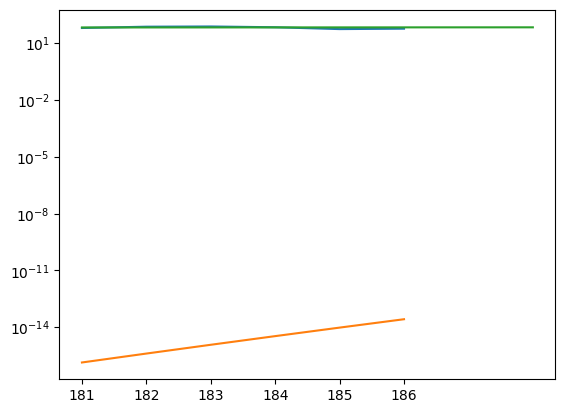

In [324]:
#Radon-222 (186 keV) Source: Radiochemical Methods | Radionuclide Monitoring
exponential_range = np.arange(182, 190)
gaussian_range = np.arange(182,188)
Dwinelle(exponential_range, gaussian_range)

C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1981165281.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Dwinelle_Cs137 = df_Dwinelle[exponential_range] #Extra points to better fit the exponential curve
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1981165281.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Dwinelle_Cs137_gaussian = df_Dwinelle[gaussian_range] #The gaussian curve itself
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1981165281.py:29: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1981165281.py:56: Depre

24.0
Activity = 323.5422061994661 Bq/min
-148.256610361139 + 86.0273762884519*sqrt(pi)
definite integral = 5 counts


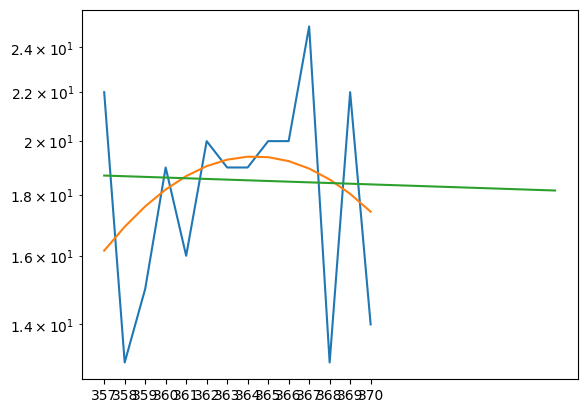

In [491]:
#Iodine-131 (364 keV) Source: Nuclide Safety Data Sheet Iodine-131
exponential_range = np.arange(349, 372)
gaussian_range = np.arange(358,372)
Dwinelle(exponential_range, gaussian_range)

$$\text{Etcheverry}$$

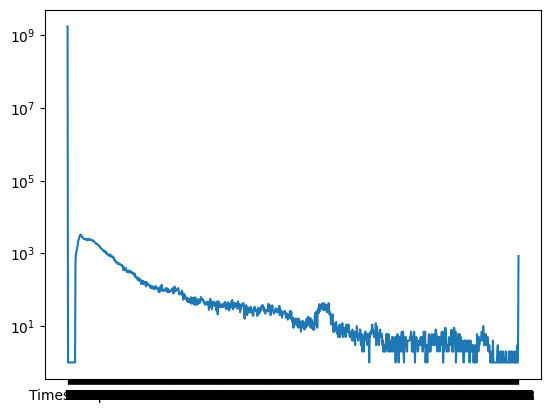

In [326]:
plt.plot(df_Etcheverry)
plt.yscale('log')

Activity = 25.912552456254602 Bq/min
for gaussian : amplitude = 1.554753147375276, mean = 2.0000000008884853, std = 1.8503652062182272
for exponential : a = 0.992691013538609, b = 0.07160346481283955
Intersection points: [0.28797143 3.22170932]
Definite integral = -3.30829231581406 + 2.31104111187719*sqrt(pi)
Total counts for U238 is : 2.4263793430524574 = 3 counts


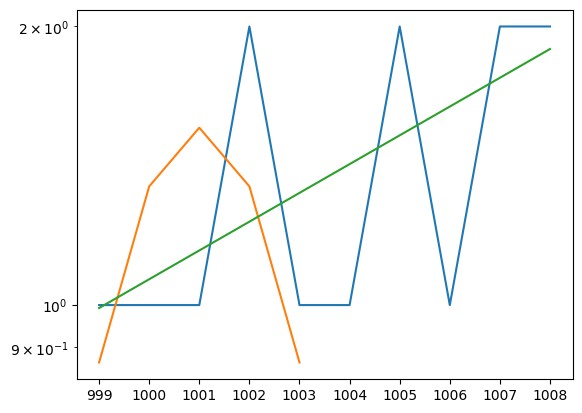

In [499]:
#Energy Peak for U238 is 1001 keV
df_Etcheverry_U238 = df_Etcheverry.iloc[1000:1010] #This chunk of data is for exponential fit
df_Etcheverry_U238_gaussian = df_Etcheverry.iloc[1001:1006] #This chunk of data is for gaussian fit
plt.plot(df_Etcheverry_U238)
plt.yscale('log')


#Gausian Fit --> Exponential Fit --> intersection --> integration
#Gaussian Fit
Etcheverry_U238_values = df_Etcheverry_U238_gaussian.values
Etcheverry_U238_values = Etcheverry_U238_values.flatten()
Etcheverry_U238_index = df_Etcheverry_U238_gaussian.index
Etcheverry_U238_index = np.arange(len(Etcheverry_U238_values))


std = np.std(df_Etcheverry_U238_gaussian.values)
mean = np.mean(df_Etcheverry_U238_gaussian.values)


def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Etcheverry_U238_index, Etcheverry_U238_values, p0 = initial_guess)
amplitude_fit, mean_fit, stddev_fit = params




plt.plot(Etcheverry_U238_index, gaussian(Etcheverry_U238_index, amplitude_fit, mean_fit, stddev_fit))

max_value = gaussian(mean_fit, amplitude_fit, mean_fit, stddev_fit)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')

#Exponential Fit
Etcheverry_U238_exponential_values = df_Etcheverry_U238.values
Etcheverry_U238_exponential_values = Etcheverry_U238_exponential_values.flatten()
Etcheverry_U238_exponential_index = df_Etcheverry_U238.index
Etcheverry_U238_exponential_index = np.arange(len(Etcheverry_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)


params, covariance = curve_fit(exponential_func, Etcheverry_U238_exponential_index, Etcheverry_U238_exponential_values)
a, b = params
plt.plot(Etcheverry_U238_exponential_index, exponential_func(Etcheverry_U238_exponential_index, a, b))


#Intersection
print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
print(f'for exponential : a = {a}, b = {b}')


def f(x, amplitude_fit, mean_fit, stddev_fit):
    return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)


def g(x, a, b):
    return a * np.exp(b * x)


def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
    return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)


x_values = np.linspace(-10, 10, 1000)


sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]


intersection_points = []
for idx in sign_changes:
    x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
    intersection_points.extend(x_root)


intersection_points = np.unique(intersection_points)


print("Intersection points:", intersection_points)


#Integrate
x = symbols('x')
f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
f_exponential = a * exp(b * x)


lower_bound = intersection_points[0]
upper_bound = intersection_points[1]


definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential


print(f'Definite integral = {definite_integral}')


print(f'Total counts for U238 is : {4.04260209376798 * np.sqrt(consts.pi) - 4.7389463057253} = 3 counts')

Activity = 572.1432973459687 Bq/min


C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\991496000.py:40: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\991496000.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intersection_point = int(intersection_point)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\991496000.py:64: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))


number of counts for Cs137 = 452


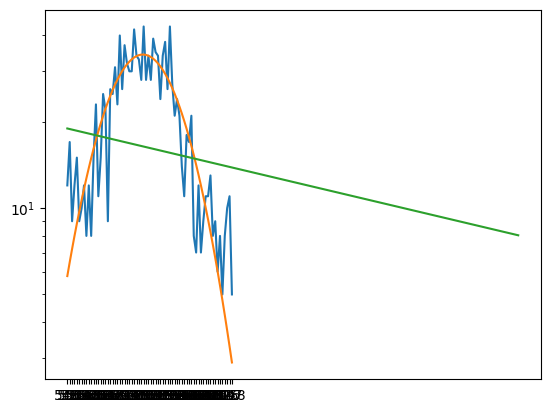

In [547]:
#Energy Peak for Cs-137 is 662 keV
df_Etcheverry_Cs137 = df_Etcheverry[510: 700] #Extra points to better fit the exponential curve
df_Etcheverry_Cs137_gaussian = df_Etcheverry[550:620] #The gaussian curve itself
plt.plot(df_Etcheverry_Cs137_gaussian)


#Gaussian Fit
Etcheverry_Cs137_gaussian_index = df_Etcheverry_Cs137_gaussian.index
Etcheverry_Cs137_gaussian_index = np.arange(len(Etcheverry_Cs137_gaussian_index))
Etcheverry_Cs137_gaussian_values = df_Etcheverry_Cs137_gaussian.values
Etcheverry_Cs137_gaussian_values = Etcheverry_Cs137_gaussian_values.flatten()


std = np.std(Etcheverry_Cs137_gaussian_values)
mean = np.mean(Etcheverry_Cs137_gaussian_values)


def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Etcheverry_Cs137_gaussian_index, Etcheverry_Cs137_gaussian_values, p0 = initial_guess)
amplitude, mean, std = params


plt.plot(Etcheverry_Cs137_gaussian_index, gaussian(Etcheverry_Cs137_gaussian_index, amplitude, mean, std))


max_value = gaussian(mean, amplitude, mean, std)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')

#Exponential Fit
Etcheverry_Cs137_index = df_Etcheverry_Cs137.index
Etcheverry_Cs137_index = np.arange(len(Etcheverry_Cs137_index))
Etcheverry_Cs137_values = df_Etcheverry_Cs137.values
Etcheverry_Cs137_values = Etcheverry_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)


params, covariance = curve_fit(exponential_func2, Etcheverry_Cs137_index, Etcheverry_Cs137_values)
a, b = params
plt.plot(Etcheverry_Cs137_index, exponential_func2(Etcheverry_Cs137_index, a, b))
plt.yscale('log')


#Intersection
def f(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


def g(x, a, b):
    return a * np.exp(-b * x)


def intersection_function(x, amplitude, mean, std, a, b):
    return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)


intersection_points = []
for i in range(len(Etcheverry_Cs137_index)):
    intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
    intersection_point = int(intersection_point)
    intersection_points.append(intersection_point)


intersection_points = np.array(intersection_points)
intersection_points = intersection_points[intersection_points < 100]
intersection_points = np.unique(intersection_points)


#Integration
x = symbols('x')
f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
f_exponential = a * exp(-b * x)


lower_bound = intersection_points[0]
upper_bound = intersection_points[1]


definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound)) 
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential


def integrand(x):
    return np.exp(0.125786623123295 * x) * np.exp(-0.00181337453702553 * x**2)


result, error = quad(integrand, lower_bound, upper_bound)


# Multiply the result by the constant and subtract the other constant
#definite_integral = 2.16175471677203 * result - definite_integral_exponential


print(f'number of counts for Cs137 = {np.ceil(definite_integral)}')


In [504]:
def Etcheverry(exponential_range, gaussian_range):

    #Energy Peak for U238 is 1001 keV
    df_Etcheverry_U238 = df_Etcheverry.iloc[exponential_range] #This chunk of data is for exponential fit
    df_Etcheverry_U238_gaussian = df_Etcheverry.iloc[gaussian_range] #This chunk of data is for gaussian fit
    plt.plot(df_Etcheverry_U238)
    plt.yscale('log')


    #Gausian Fit --> Exponential Fit --> intersection --> integration
    #Gaussian Fit
    Etcheverry_U238_values = df_Etcheverry_U238_gaussian.values
    Etcheverry_U238_values = Etcheverry_U238_values.flatten()
    Etcheverry_U238_index = df_Etcheverry_U238_gaussian.index
    Etcheverry_U238_index = np.arange(len(Etcheverry_U238_values))


    std = np.std(df_Etcheverry_U238_gaussian.values)
    mean = np.mean(df_Etcheverry_U238_gaussian.values)


    def gaussian(x, amplitude, mean, std):
        return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


    initial_guess = (1, mean, std)
    params, covariance = curve_fit(gaussian, Etcheverry_U238_index, Etcheverry_U238_values, p0 = initial_guess, maxfev = 100000)
    amplitude_fit, mean_fit, stddev_fit = params


    max_value = gaussian(mean_fit, amplitude_fit, mean_fit, stddev_fit)
    Activity = max_value/.06 
    print(f'Activity = {Activity} Bq/min')

    plt.plot(Etcheverry_U238_index, gaussian(Etcheverry_U238_index, amplitude_fit, mean_fit, stddev_fit))


    #Exponential Fit
    Etcheverry_U238_exponential_values = df_Etcheverry_U238.values
    Etcheverry_U238_exponential_values = Etcheverry_U238_exponential_values.flatten()
    Etcheverry_U238_exponential_index = df_Etcheverry_U238.index
    Etcheverry_U238_exponential_index = np.arange(len(Etcheverry_U238_exponential_index))
    def exponential_func(x, a, b):
        return a * np.exp(b * x)


    params, covariance = curve_fit(exponential_func, Etcheverry_U238_exponential_index, Etcheverry_U238_exponential_values)
    a, b = params
    plt.plot(Etcheverry_U238_exponential_index, exponential_func(Etcheverry_U238_exponential_index, a, b))


    #Intersection
    print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
    print(f'for exponential : a = {a}, b = {b}')


    def f(x, amplitude_fit, mean_fit, stddev_fit):
        return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)


    def g(x, a, b):
        return a * np.exp(b * x)


    def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
        return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)


    x_values = np.linspace(-10, 100, 1000)


    sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]


    intersection_points = []
    for idx in sign_changes:
        x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
        intersection_points.extend(x_root)

    if intersection_points == []:
        print('there is no counts for this element')
        sys.exit()


    intersection_points = np.unique(intersection_points)


    print("Intersection points:", intersection_points)


    #Integrate
    x = symbols('x')
    f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
    f_exponential = a * exp(b * x)


    lower_bound = intersection_points[0]
    upper_bound = intersection_points[1]


    definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
    definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
    definite_integral = definite_integral_gaussian - definite_integral_exponential


    print(f'Definite integral = {np.ceil(definite_integral)} counts')


28.0
There are no counts for Radon-222 in Etcheverry (seen by the fact that there is no area between the peak and the exponential fit)


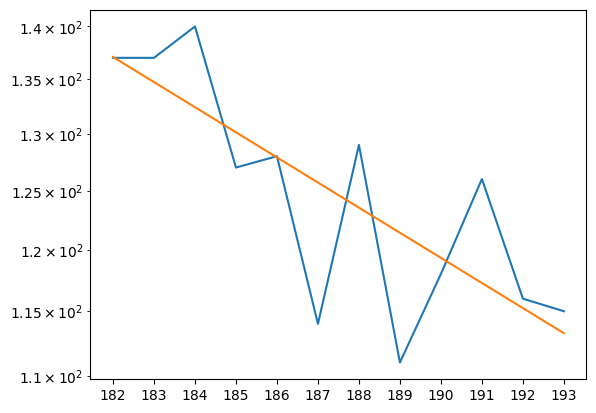

In [505]:
#Energy Peak for Radon 222 is 186 keV
df_Etcheverry_U238 = df_Etcheverry.iloc[183: 195] #This chunk of data is for exponential fit
df_Etcheverry_U238_gaussian = df_Etcheverry.iloc[184: 300] #This chunk of data is for gaussian fit
plt.plot(df_Etcheverry_U238)
plt.yscale('log')

Etcheverry_U238_exponential_values = df_Etcheverry_U238.values
Etcheverry_U238_exponential_values = Etcheverry_U238_exponential_values.flatten()
Etcheverry_U238_exponential_index = df_Etcheverry_U238.index
Etcheverry_U238_exponential_index = np.arange(len(Etcheverry_U238_exponential_index))

max_point = np.max(Dwinelle_Cs137_values)
print(max_point)

def exponential_func(x, a, b):
    return a * np.exp(b * x)


params, covariance = curve_fit(exponential_func, Etcheverry_U238_exponential_index, Etcheverry_U238_exponential_values)
a, b = params
plt.plot(Etcheverry_U238_exponential_index, exponential_func(Etcheverry_U238_exponential_index, a, b))

print('There are no counts for Radon-222 in Etcheverry (seen by the fact that there is no area between the peak and the exponential fit)')


Activity = 675.7268815624113 Bq/min
for gaussian : amplitude = 40.54361289374468, mean = 10.29636161819775, std = 15.363791632300664
for exponential : a = 38.02946281417724, b = 0.0015336288275987194
Intersection points: [ 5.14913865 14.7195704 ]
Definite integral = 13 counts


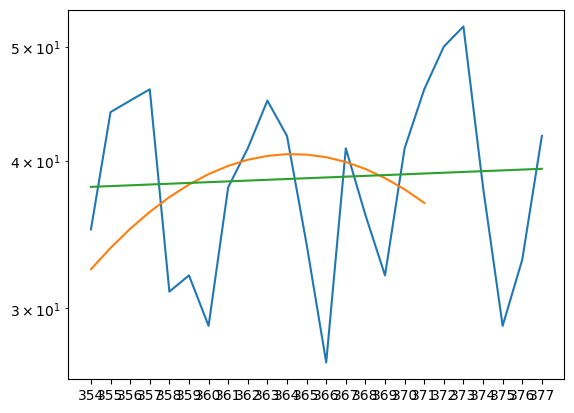

In [506]:
#Iodine-131 (364 keV) Source: Nuclide Safety Data Sheet Iodine-131
exponential_range = np.arange(355, 379)
gaussian_range = np.arange(360, 378)
Etcheverry(exponential_range, gaussian_range)

$$\text{Evans}$$

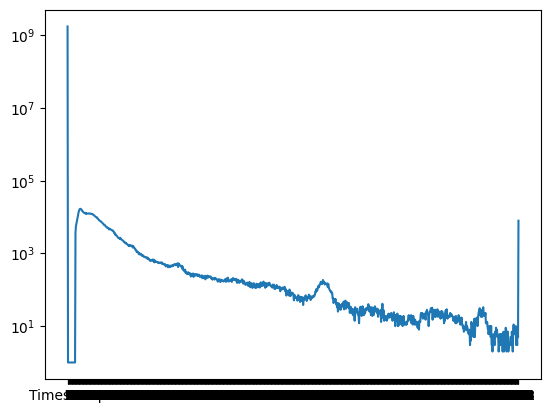

In [332]:
plt.plot(df_Evans)
plt.yscale('log')

Activity = 123.2917140074913 Bq/min
for gaussian : amplitude = 7.397502840449477, mean = -0.3347904371685913, std = 1.9936072537783134
for exponential : a = 3.339629511910826, b = 0.04348648214626323
Intersection points: [-3.05070563  2.03545333]
Definite integral = -16.6489214276929 + 16.6061964063133*sqrt(pi)
Total counts for U238 is : 12.784795341570444 = 13 counts


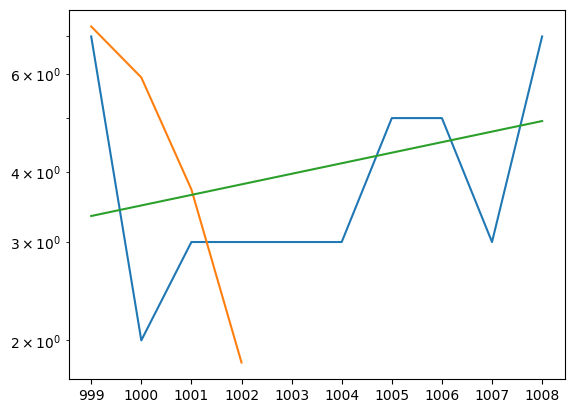

In [507]:
#Energy Peak for U238 is 1001 keV
df_Evans_U238 = df_Evans.iloc[1000:1010] #This chunk of data is for exponential fit; green 
df_Evans_U238_gaussian = df_Evans.iloc[999:1003] #This chunk of data is for gaussian fit; orange
plt.plot(df_Evans_U238)
plt.yscale('log')


#Gausian Fit --> Exponential Fit --> intersection --> integration
#Gaussian Fit
Evans_U238_values = df_Evans_U238_gaussian.values
Evans_U238_values = Evans_U238_values.flatten()
Evans_U238_index = df_Evans_U238_gaussian.index
Evans_U238_index = np.arange(len(Evans_U238_values))


std = np.std(df_Evans_U238_gaussian.values)
mean = np.mean(df_Evans_U238_gaussian.values)


def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Evans_U238_index, Evans_U238_values, p0 = initial_guess)
amplitude_fit, mean_fit, stddev_fit = params

max_value = gaussian(mean_fit, amplitude_fit, mean_fit, stddev_fit)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')


plt.plot(Evans_U238_index, gaussian(Evans_U238_index, amplitude_fit, mean_fit, stddev_fit))


#Exponential Fit
Evans_U238_exponential_values = df_Evans_U238.values
Evans_U238_exponential_values = Evans_U238_exponential_values.flatten()
Evans_U238_exponential_index = df_Evans_U238.index
Evans_U238_exponential_index = np.arange(len(Evans_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)


params, covariance = curve_fit(exponential_func, Evans_U238_exponential_index, Evans_U238_exponential_values)
a, b = params
plt.plot(Evans_U238_exponential_index, exponential_func(Evans_U238_exponential_index, a, b))


#Intersection
print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
print(f'for exponential : a = {a}, b = {b}')


def f(x, amplitude_fit, mean_fit, stddev_fit):
    return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)


def g(x, a, b):
    return a * np.exp(b * x)


def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
    return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)


x_values = np.linspace(-10, 10, 1000)


sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]


intersection_points = []
for idx in sign_changes:
    x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
    intersection_points.extend(x_root)


intersection_points = np.unique(intersection_points)


print("Intersection points:", intersection_points)


#Integrate
x = symbols('x')
f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
f_exponential = a * exp(b * x)


lower_bound = intersection_points[0]
upper_bound = intersection_points[1]


definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential


print(f'Definite integral = {definite_integral}')


print(f'Total counts for U238 is : {-16.6489214276929 + 16.6061964063133*np.sqrt(consts.pi)} = 13 counts')

Activity = 2540.9693590844645 Bq/min


C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1456322368.py:34: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1456322368.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intersection_point = int(intersection_point)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1456322368.py:53: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))


-3248.52644691467 + 2887.08349953938*sqrt(pi)
definite integral = 1868.6958197296776 = 1869 counts


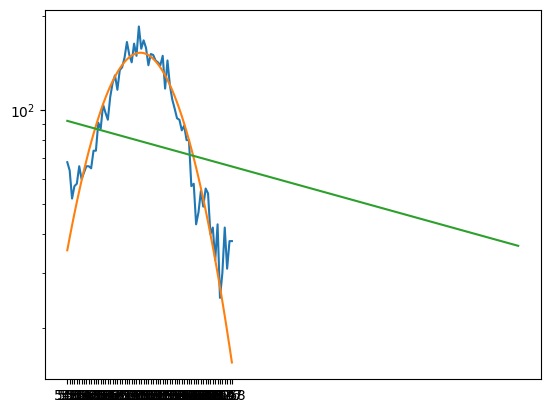

In [509]:
#Energy Peak for Cs-137 is 662 keV
df_Evans_Cs137 = df_Evans[510: 700] #Extra points to better fit the exponential curve
df_Evans_Cs137_gaussian = df_Evans[550:620] #The gaussian curve itself
plt.plot(df_Evans_Cs137_gaussian)

#Gaussian Fit
Evans_Cs137_gaussian_index = df_Evans_Cs137_gaussian.index
Evans_Cs137_gaussian_index = np.arange(len(Evans_Cs137_gaussian_index))
Evans_Cs137_gaussian_values = df_Evans_Cs137_gaussian.values
Evans_Cs137_gaussian_values = Evans_Cs137_gaussian_values.flatten()

std = np.std(Evans_Cs137_gaussian_values)
mean = np.mean(Evans_Cs137_gaussian_values)

def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Evans_Cs137_gaussian_index, Evans_Cs137_gaussian_values, p0 = initial_guess)
amplitude, mean, std = params

plt.plot(Evans_Cs137_gaussian_index, gaussian(Evans_Cs137_gaussian_index, amplitude, mean, std))

max_value = gaussian(mean, amplitude, mean, std)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')

#Exponential Fit
Evans_Cs137_index = df_Evans_Cs137.index
Evans_Cs137_index = np.arange(len(Evans_Cs137_index))
Evans_Cs137_values = df_Evans_Cs137.values
Evans_Cs137_values = Evans_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)

params, covariance = curve_fit(exponential_func2, Evans_Cs137_index, Evans_Cs137_values)
a, b = params
plt.plot(Evans_Cs137_index, exponential_func2(Evans_Cs137_index, a, b))
plt.yscale('log')

#Intersection
def f(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

def g(x, a, b):
    return a * np.exp(-b * x)

def intersection_function(x, amplitude, mean, std, a, b):
    return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)

intersection_points = []
for i in range(len(Evans_Cs137_index)):
    intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
    intersection_point = int(intersection_point)
    intersection_points.append(intersection_point)

intersection_points = np.array(intersection_points)
intersection_points = intersection_points[intersection_points < 100]
intersection_points = np.unique(intersection_points)

#Integration
x = symbols('x')
f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
f_exponential = a * exp(-b * x)

lower_bound = intersection_points[0]
upper_bound = intersection_points[1]

definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound)) 
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential
print(definite_integral)
print(f'definite integral = {-3248.52644691467 + 2887.08349953938*np.sqrt(consts.pi)} = 1869 counts')

#def integrand(x):
    #return np.exp(0.125786623123295 * x) * np.exp(-0.00181337453702553 * x**2)

#result, error = quad(integrand, lower_bound, upper_bound)

# Multiply the result by the constant and subtract the other constant
#definite_integral = 2.16175471677203 * result - definite_integral_exponential

#print(f'number of counts for Cs137 = {definite_integral}')

In [517]:
def Evans(exponential_range, gaussian_range):
    #Energy Peak for U238 is 1001 keV
    df_Evans_U238 = df_Evans.iloc[exponential_range] #This chunk of data is for exponential fit; green 
    df_Evans_U238_gaussian = df_Evans.iloc[gaussian_range] #This chunk of data is for gaussian fit; orange
    plt.plot(df_Evans_U238)
    plt.yscale('log')


    #Gausian Fit --> Exponential Fit --> intersection --> integration
    #Gaussian Fit
    Evans_U238_values = df_Evans_U238_gaussian.values
    Evans_U238_values = Evans_U238_values.flatten()
    Evans_U238_index = df_Evans_U238_gaussian.index
    Evans_U238_index = np.arange(len(Evans_U238_values))


    std = np.std(df_Evans_U238_gaussian.values)
    mean = np.mean(df_Evans_U238_gaussian.values)


    def gaussian(x, amplitude, mean, std):
        return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


    initial_guess = (1, mean, std)
    params, covariance = curve_fit(gaussian, Evans_U238_index, Evans_U238_values, p0 = initial_guess, maxfev = 1000000)
    amplitude_fit, mean_fit, stddev_fit = params

    max_value = gaussian(mean_fit, amplitude_fit, mean_fit, stddev_fit)
    Activity = max_value/.06 
    print(f'Activity = {Activity} Bq/min')


    plt.plot(Evans_U238_index, gaussian(Evans_U238_index, amplitude_fit, mean_fit, stddev_fit))


    #Exponential Fit
    Evans_U238_exponential_values = df_Evans_U238.values
    Evans_U238_exponential_values = Evans_U238_exponential_values.flatten()
    Evans_U238_exponential_index = df_Evans_U238.index
    Evans_U238_exponential_index = np.arange(len(Evans_U238_exponential_index))
    def exponential_func(x, a, b):
        return a * np.exp(b * x)


    params, covariance = curve_fit(exponential_func, Evans_U238_exponential_index, Evans_U238_exponential_values)
    a, b = params
    plt.plot(Evans_U238_exponential_index, exponential_func(Evans_U238_exponential_index, a, b))


    #Intersection
    print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
    print(f'for exponential : a = {a}, b = {b}')


    def f(x, amplitude_fit, mean_fit, stddev_fit):
        return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)


    def g(x, a, b):
        return a * np.exp(b * x)


    def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
        return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)


    x_values = np.linspace(-100000, 100000, 10000000)


    sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]


    intersection_points = []
    for idx in sign_changes:
        x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
        intersection_points.extend(x_root)
    
    intersection_points = np.unique(intersection_points)
    


    print("Intersection points:", intersection_points)


    #Integrate
    x = symbols('x')
    f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
    f_exponential = a * exp(b * x)


    lower_bound = intersection_points[0]
    upper_bound = intersection_points[1]


    definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
    definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
    definite_integral = definite_integral_gaussian - definite_integral_exponential


    print(f'Definite integral = {np.ceil(definite_integral)}')



There are no found counts for this isotope


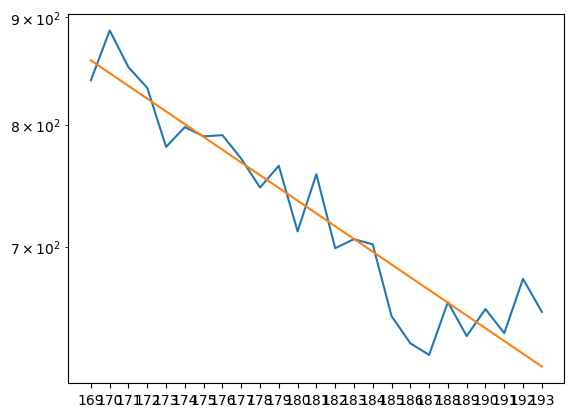

In [336]:
#Energy Peak for Radon 222 is 186 keV
df_Evans_U238 = df_Evans.iloc[170: 195] #This chunk of data is for exponential fit; green 
df_Evans_U238_gaussian = df_Evans.iloc[gaussian_range] #This chunk of data is for gaussian fit; orange
plt.plot(df_Evans_U238)
plt.yscale('log')

#Exponential Fit
Evans_U238_exponential_values = df_Evans_U238.values
Evans_U238_exponential_values = Evans_U238_exponential_values.flatten()
Evans_U238_exponential_index = df_Evans_U238.index
Evans_U238_exponential_index = np.arange(len(Evans_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)


params, covariance = curve_fit(exponential_func, Evans_U238_exponential_index, Evans_U238_exponential_values)
a, b = params
plt.plot(Evans_U238_exponential_index, exponential_func(Evans_U238_exponential_index, a, b))

print('There are no found counts for this isotope')

Activity = 3089.21350902124 Bq/min
for gaussian : amplitude = 185.3528105412744, mean = 13.159709500962137, std = 49.17744877697237
for exponential : a = 177.26968695426726, b = 0.0026540035146682536
Intersection points: [-2.63617192 16.11859277]
Definite integral = 42
this is a very vague estimate, and the result should be usually less


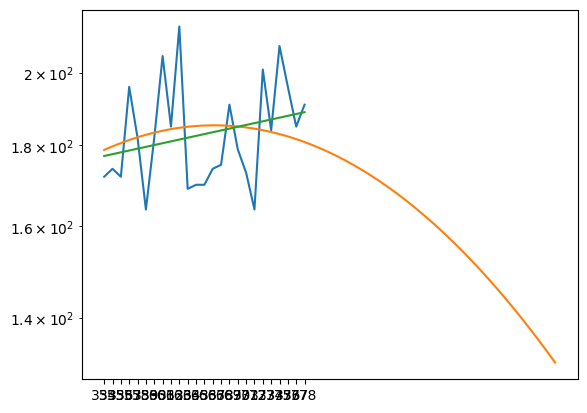

In [518]:
#Energy Peak for Iodine 131 is 364 keV
exponential_range = np.arange(355, 380)
gaussian_range = np.arange(360, 415)
Evans(exponential_range, gaussian_range)
print('this is a very vague estimate, and the result should be usually less')

$$\text{Hearst}$$

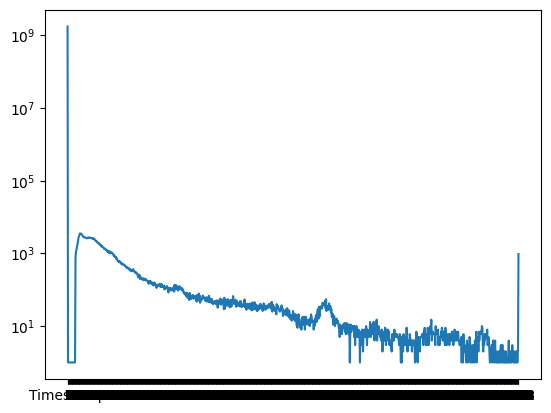

In [338]:
plt.plot(df_Hearst)
plt.yscale('log')

Activity = 45.731400715726544 Bq/min
for gaussian : amplitude = 2.7438840429435927, mean = 0.8786573368088558, std = 1.9760957906604504
for exponential : a = 1.960678149084844, b = -0.01932695424547355
Intersection points: [-0.70813162  2.61638806]


Definite integral = -6.40031516586528 + 4.59635774693879*sqrt(pi)
Total counts for U238 is : 1.7465168228357797 = 2 counts


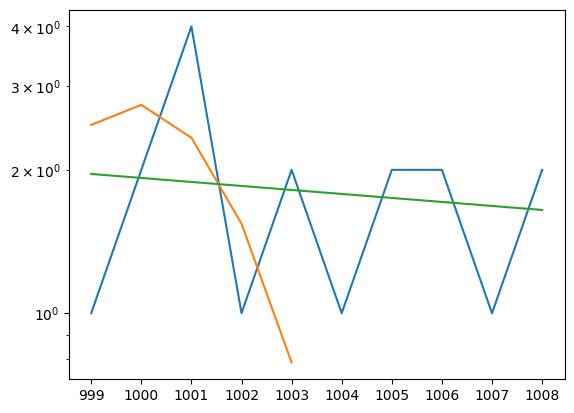

In [519]:
#Energy Peak for U238 is 1001 keV
df_Hearst_U238 = df_Hearst.iloc[1000:1010] #This chunk of data is for exponential fit
df_Hearst_U238_gaussian = df_Hearst.iloc[1001:1006] #This chunk of data is for gaussian fit
plt.plot(df_Hearst_U238)
plt.yscale('log')


#Gausian Fit --> Exponential Fit --> intersection --> integration
#Gaussian Fit
Hearst_U238_values = df_Hearst_U238_gaussian.values
Hearst_U238_values = Hearst_U238_values.flatten()
Hearst_U238_index = df_Hearst_U238_gaussian.index
Hearst_U238_index = np.arange(len(Hearst_U238_values))


std = np.std(df_Hearst_U238_gaussian.values)
mean = np.mean(df_Hearst_U238_gaussian.values)


def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Hearst_U238_index, Hearst_U238_values, p0 = initial_guess)
amplitude_fit, mean_fit, stddev_fit = params

max_value = gaussian(mean_fit, amplitude_fit, mean_fit, stddev_fit)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')


plt.plot(Hearst_U238_index, gaussian(Hearst_U238_index, amplitude_fit, mean_fit, stddev_fit))


#Exponential Fit
Hearst_U238_exponential_values = df_Hearst_U238.values
Hearst_U238_exponential_values = Hearst_U238_exponential_values.flatten()
Hearst_U238_exponential_index = df_Hearst_U238.index
Hearst_U238_exponential_index = np.arange(len(Hearst_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)


params, covariance = curve_fit(exponential_func, Hearst_U238_exponential_index, Hearst_U238_exponential_values)
a, b = params
plt.plot(Hearst_U238_exponential_index, exponential_func(Hearst_U238_exponential_index, a, b))


#Intersection
print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
print(f'for exponential : a = {a}, b = {b}')


def f(x, amplitude_fit, mean_fit, stddev_fit):
    return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)


def g(x, a, b):
    return a * np.exp(b * x)


def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
    return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)


x_values = np.linspace(-10, 10, 1000)


sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]


intersection_points = []
for idx in sign_changes:
    x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
    intersection_points.extend(x_root)


intersection_points = np.unique(intersection_points)


print("Intersection points:", intersection_points)


#Integrate
x = symbols('x')
f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
f_exponential = a * exp(b * x)


lower_bound = intersection_points[0]
upper_bound = intersection_points[1]


definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential


print(f'Definite integral = {definite_integral}')


print(f'Total counts for U238 is : {-6.40031516586528 + 4.59635774693879*np.sqrt(consts.pi)} = 2 counts')

Activity = 629.4533609538518 Bq/min


C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3686538898.py:40: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3686538898.py:40: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3686538898.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intersection_point = int(intersection_point)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3686538898.py:64: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3686538898.py:64: RuntimeWarning: The iteration is not making good progress, as measured by the 

-786.421384226863 + 720.477068624482*sqrt(pi)
definite integral = 490.5909705457177 counts


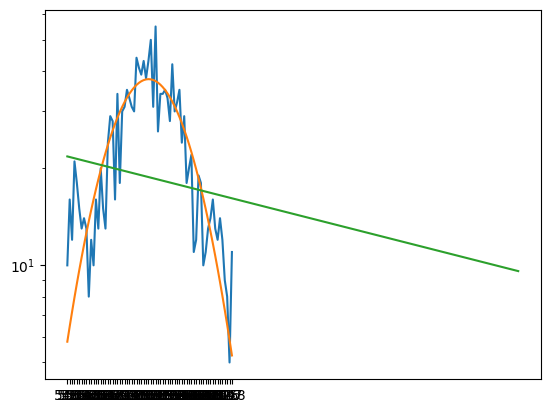

In [520]:
#Energy Peak for Cs-137 is 662 keV
df_Hearst_Cs137 = df_Hearst[510: 700] #Extra points to better fit the exponential curve
df_Hearst_Cs137_gaussian = df_Hearst[550:620] #The gaussian curve itself
plt.plot(df_Hearst_Cs137_gaussian)


#Gaussian Fit
Hearst_Cs137_gaussian_index = df_Hearst_Cs137_gaussian.index
Hearst_Cs137_gaussian_index = np.arange(len(Hearst_Cs137_gaussian_index))
Hearst_Cs137_gaussian_values = df_Hearst_Cs137_gaussian.values
Hearst_Cs137_gaussian_values = Hearst_Cs137_gaussian_values.flatten()


std = np.std(Hearst_Cs137_gaussian_values)
mean = np.mean(Hearst_Cs137_gaussian_values)


def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Hearst_Cs137_gaussian_index, Hearst_Cs137_gaussian_values, p0 = initial_guess)
amplitude, mean, std = params


plt.plot(Hearst_Cs137_gaussian_index, gaussian(Hearst_Cs137_gaussian_index, amplitude, mean, std))

max_value = gaussian(mean, amplitude, mean, std)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')


#Exponential Fit
Hearst_Cs137_index = df_Hearst_Cs137.index
Hearst_Cs137_index = np.arange(len(Hearst_Cs137_index))
Hearst_Cs137_values = df_Hearst_Cs137.values
Hearst_Cs137_values = Hearst_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)


params, covariance = curve_fit(exponential_func2, Hearst_Cs137_index, Hearst_Cs137_values)
a, b = params
plt.plot(Hearst_Cs137_index, exponential_func2(Hearst_Cs137_index, a, b))
plt.yscale('log')


#Intersection
def f(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


def g(x, a, b):
    return a * np.exp(-b * x)


def intersection_function(x, amplitude, mean, std, a, b):
    return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)


intersection_points = []
for i in range(len(Hearst_Cs137_index)):
    intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
    intersection_point = int(intersection_point)
    intersection_points.append(intersection_point)


intersection_points = np.array(intersection_points)
intersection_points = intersection_points[intersection_points < 100]
intersection_points = np.unique(intersection_points)


#Integration
x = symbols('x')
f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
f_exponential = a * exp(-b * x)


lower_bound = intersection_points[0]
upper_bound = intersection_points[1]


definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound)) 
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential
print(definite_integral)
print(f'definite integral = {-786.421384226863 + 720.477068624482*np.sqrt(np.pi)} counts')


#def integrand(x):
    #return np.exp(0.125786623123295 * x) * np.exp(-0.00181337453702553 * x**2)


#result, error = quad(integrand, lower_bound, upper_bound)


# Multiply the result by the constant and subtract the other constant
#definite_integral = 2.16175471677203 * result - definite_integral_exponential


#print(f'number of counts for Cs137 = {definite_integral}')

In [521]:
def Hearst(exponential_range, gaussian_range):

    #Energy Peak for Cs-137 is 662 keV
    df_Hearst_Cs137 = df_Hearst[exponential_range] #Extra points to better fit the exponential curve
    df_Hearst_Cs137_gaussian = df_Hearst[gaussian_range] #The gaussian curve itself
    plt.plot(df_Hearst_Cs137_gaussian)


    #Gaussian Fit
    Hearst_Cs137_gaussian_index = df_Hearst_Cs137_gaussian.index
    Hearst_Cs137_gaussian_index = np.arange(len(Hearst_Cs137_gaussian_index))
    Hearst_Cs137_gaussian_values = df_Hearst_Cs137_gaussian.values
    Hearst_Cs137_gaussian_values = Hearst_Cs137_gaussian_values.flatten()


    std = np.std(Hearst_Cs137_gaussian_values)
    mean = np.mean(Hearst_Cs137_gaussian_values)


    def gaussian(x, amplitude, mean, std):
        return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


    initial_guess = (1, mean, std)
    params, covariance = curve_fit(gaussian, Hearst_Cs137_gaussian_index, Hearst_Cs137_gaussian_values, p0 = initial_guess, maxfev = 1000000)
    amplitude, mean, std = params


    plt.plot(Hearst_Cs137_gaussian_index, gaussian(Hearst_Cs137_gaussian_index, amplitude, mean, std))

    max_value = gaussian(mean, amplitude, mean, std)
    Activity = max_value/.06 
    print(f'Activity = {Activity} Bq/min')


    #Exponential Fit
    Hearst_Cs137_index = df_Hearst_Cs137.index
    Hearst_Cs137_index = np.arange(len(Hearst_Cs137_index))
    Hearst_Cs137_values = df_Hearst_Cs137.values
    Hearst_Cs137_values = Hearst_Cs137_values.flatten()
    def exponential_func2(x, a, b):
        return a * np.exp(-b * x)


    params, covariance = curve_fit(exponential_func2, Hearst_Cs137_index, Hearst_Cs137_values)
    a, b = params
    plt.plot(Hearst_Cs137_index, exponential_func2(Hearst_Cs137_index, a, b))
    plt.yscale('log')


    #Intersection
    def f(x, amplitude, mean, std):
        return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


    def g(x, a, b):
        return a * np.exp(-b * x)


    def intersection_function(x, amplitude, mean, std, a, b):
        return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)


    intersection_points = []
    for i in range(len(Hearst_Cs137_index)):
        intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
        intersection_point = int(intersection_point)
        intersection_points.append(intersection_point)


    intersection_points = np.array(intersection_points)
    intersection_points = intersection_points[intersection_points < 100]
    intersection_points = np.unique(intersection_points)


    #Integration
    x = symbols('x')
    f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
    f_exponential = a * exp(-b * x)


    lower_bound = intersection_points[0]
    upper_bound = intersection_points[1]


    definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound)) 
    definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
    definite_integral = definite_integral_gaussian - definite_integral_exponential

    print(f'definite integral = {np.ceil(definite_integral)} counts')

C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3790666582.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Hearst_Cs137_gaussian = df_Hearst[gaussian_range] #The gaussian curve itself
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3790666582.py:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


number of counts detected must be > 12 counts


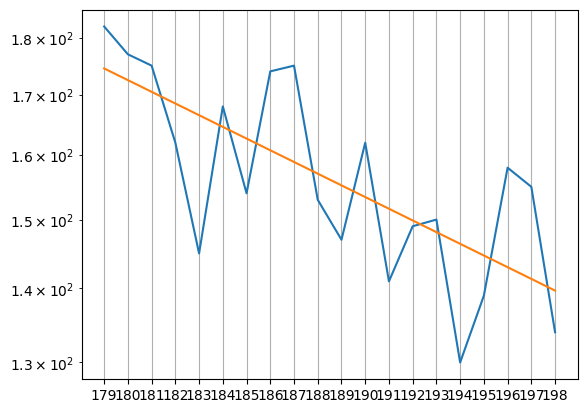

In [361]:
#Energy Peak for 222 Radon is 186 keV
df_Hearst_Cs137 = df_Hearst[180: 200] #Extra points to better fit the exponential curve
df_Hearst_Cs137_gaussian = df_Hearst[gaussian_range] #The gaussian curve itself
plt.plot(df_Hearst_Cs137)

Hearst_Cs137_index = df_Hearst_Cs137.index
Hearst_Cs137_index = np.arange(len(Hearst_Cs137_index))
Hearst_Cs137_values = df_Hearst_Cs137.values
Hearst_Cs137_values = Hearst_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)

params, covariance = curve_fit(exponential_func2, Hearst_Cs137_index, Hearst_Cs137_values)
a, b = params
plt.plot(Hearst_Cs137_index, exponential_func2(Hearst_Cs137_index, a, b))
plt.yscale('log')
plt.grid()

print('number of counts detected must be > 12 counts')

C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3897210016.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Hearst_Cs137 = df_Hearst[exponential_range] #Extra points to better fit the exponential curve
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3897210016.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Hearst_Cs137_gaussian = df_Hearst[gaussian_range] #The gaussian curve itself
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3897210016.py:42: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3897210016.py:67: DeprecationWa

Activity = 797.3628132393884 Bq/min
definite integral = 10 counts


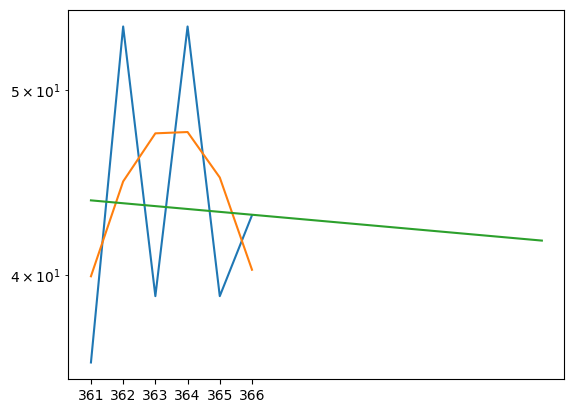

In [522]:
#Energy peak for 131 Iodine is 364 keV
exponential_range = np.arange(355, 370)
gaussian_range = np.arange(362, 368)
Hearst(exponential_range, gaussian_range)

$$\text{Moffit}$$

Text(0.5, 1.0, 'Moffitt')

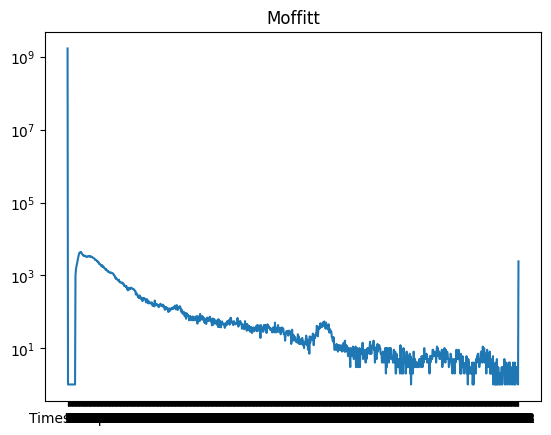

In [344]:
plt.plot(df_Moffit)
plt.yscale('log')
plt.title("Moffitt")

Activity = 51.4436902093877 Bq/min
for gaussian : amplitude = 3.086621412563262, mean = 1.487354350818831, std = 6.224570458069606
for exponential : a = 3.1760789983098507, b = -0.036109572459113594
Intersection points: [0.9102405  4.86261901]
Definite integral = -11.3201664032248 + 6.60561658734175*sqrt(pi)
Total counts for U238 is : 0.38798415461443625 = 1 count


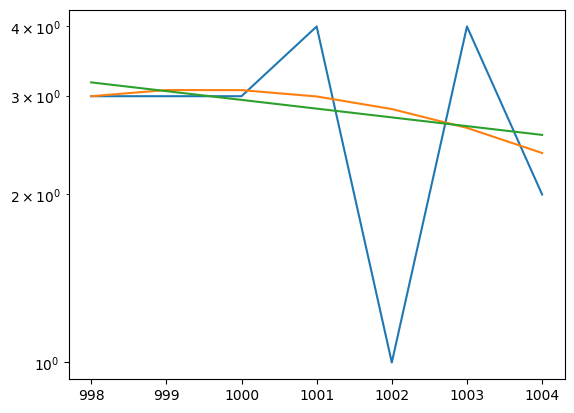

In [524]:
#Energy Peak for U238 is 1001 keV
df_Moffit_U238 = df_Moffit.iloc[999:1006] #This chunk of data is for exponential fit
df_Moffit_U238_gaussian = df_Moffit.iloc[999:1006] #This chunk of data is for gaussian fit
plt.plot(df_Moffit_U238)
plt.yscale('log')

#Gausian Fit --> Exponential Fit --> intersection --> integration
#Gaussian Fit
Moffit_U238_values = df_Moffit_U238_gaussian.values
Moffit_U238_values = Moffit_U238_values.flatten()
Moffit_U238_index = df_Moffit_U238_gaussian.index
Moffit_U238_index = np.arange(len(Moffit_U238_values))

std = np.std(df_Moffit_U238_gaussian.values)
mean = np.mean(df_Moffit_U238_gaussian.values)

def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Moffit_U238_index, Moffit_U238_values, p0 = initial_guess)
amplitude_fit, mean_fit, stddev_fit = params

plt.plot(Moffit_U238_index, gaussian(Moffit_U238_index, amplitude_fit, mean_fit, stddev_fit))

max_value = gaussian(mean_fit, amplitude_fit, mean_fit, stddev_fit)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')

#Exponential Fit
Moffit_U238_exponential_values = df_Moffit_U238.values
Moffit_U238_exponential_values = Moffit_U238_exponential_values.flatten()
Moffit_U238_exponential_index = df_Moffit_U238.index
Moffit_U238_exponential_index = np.arange(len(Moffit_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exponential_func, Moffit_U238_exponential_index, Moffit_U238_exponential_values)
a, b = params
plt.plot(Moffit_U238_exponential_index, exponential_func(Moffit_U238_exponential_index, a, b))

#Intersection
print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
print(f'for exponential : a = {a}, b = {b}')

def f(x, amplitude_fit, mean_fit, stddev_fit):
    return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)

def g(x, a, b):
    return a * np.exp(b * x)

def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
    return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)

x_values = np.linspace(-10, 10, 1000)
sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]

intersection_points = []
for idx in sign_changes:
    x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
    intersection_points.extend(x_root)

intersection_points = np.unique(intersection_points)

print("Intersection points:", intersection_points)

#Integrate
x = symbols('x')
f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
f_exponential = a * exp(b * x)

lower_bound = intersection_points[0]
upper_bound = intersection_points[1]

definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential

print(f'Definite integral = {definite_integral}')

print(f'Total counts for U238 is : {-11.3201664032248 + 6.60561658734175*np.sqrt(consts.pi)} = 1 count')

Activity = 723.2690732221588 Bq/min


C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3911565577.py:39: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3911565577.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intersection_point = int(intersection_point)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3911565577.py:63: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\3911565577.py:63: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))


-932.141229383657 + 833.716815441891*sqrt(pi)
definite integral = 546 counts


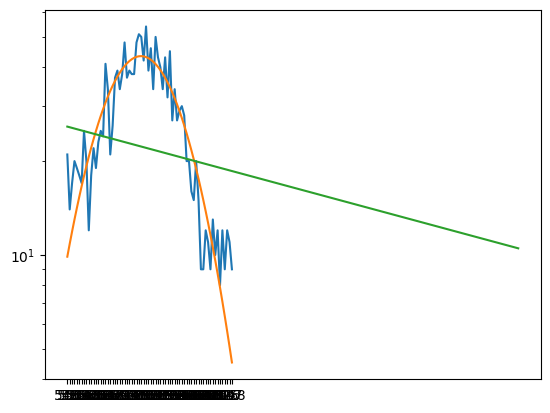

In [525]:
#Energy Peak for Cs-137 is 662 keV
df_Moffit_Cs137 = df_Moffit[510: 700] #Extra points to better fit the exponential curve
df_Moffit_Cs137_gaussian = df_Moffit[550:620] #The gaussian curve itself
plt.plot(df_Moffit_Cs137_gaussian)


#Gaussian Fit
Moffit_Cs137_gaussian_index = df_Moffit_Cs137_gaussian.index
Moffit_Cs137_gaussian_index = np.arange(len(Moffit_Cs137_gaussian_index))
Moffit_Cs137_gaussian_values = df_Moffit_Cs137_gaussian.values
Moffit_Cs137_gaussian_values = Moffit_Cs137_gaussian_values.flatten()


std = np.std(Moffit_Cs137_gaussian_values)
mean = np.mean(Moffit_Cs137_gaussian_values)


def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Moffit_Cs137_gaussian_index, Moffit_Cs137_gaussian_values, p0 = initial_guess)
amplitude, mean, std = params


plt.plot(Moffit_Cs137_gaussian_index, gaussian(Moffit_Cs137_gaussian_index, amplitude, mean, std))

max_value = gaussian(mean, amplitude, mean, std)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')

#Exponential Fit
Moffit_Cs137_index = df_Moffit_Cs137.index
Moffit_Cs137_index = np.arange(len(Moffit_Cs137_index))
Moffit_Cs137_values = df_Moffit_Cs137.values
Moffit_Cs137_values = Moffit_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)


params, covariance = curve_fit(exponential_func2, Moffit_Cs137_index, Moffit_Cs137_values)
a, b = params
plt.plot(Moffit_Cs137_index, exponential_func2(Moffit_Cs137_index, a, b))
plt.yscale('log')


#Intersection
def f(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


def g(x, a, b):
    return a * np.exp(-b * x)


def intersection_function(x, amplitude, mean, std, a, b):
    return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)


intersection_points = []
for i in range(len(Moffit_Cs137_index)):
    intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
    intersection_point = int(intersection_point)
    intersection_points.append(intersection_point)


intersection_points = np.array(intersection_points)
intersection_points = intersection_points[intersection_points < 100]
intersection_points = np.unique(intersection_points)


#Integration
x = symbols('x')
f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
f_exponential = a * exp(-b * x)


lower_bound = intersection_points[0]
upper_bound = intersection_points[1]


definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound)) 
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential
print(definite_integral)
print(f'definite integral = {np.ceil(definite_integral)} counts')

In [366]:
def Moffit(exponential_range, gaussian_range):

    #Energy Peak for Cs-137 is 662 keV
    df_Moffit_Cs137 = df_Moffit[exponential_range] #Extra points to better fit the exponential curve
    df_Moffit_Cs137_gaussian = df_Moffit[gaussian_range] #The gaussian curve itself
    plt.plot(df_Moffit_Cs137_gaussian)


    #Gaussian Fit
    Moffit_Cs137_gaussian_index = df_Moffit_Cs137_gaussian.index
    Moffit_Cs137_gaussian_index = np.arange(len(Moffit_Cs137_gaussian_index))
    Moffit_Cs137_gaussian_values = df_Moffit_Cs137_gaussian.values
    Moffit_Cs137_gaussian_values = Moffit_Cs137_gaussian_values.flatten()


    std = np.std(Moffit_Cs137_gaussian_values)
    mean = np.mean(Moffit_Cs137_gaussian_values)


    def gaussian(x, amplitude, mean, std):
        return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


    initial_guess = (1, mean, std)
    params, covariance = curve_fit(gaussian, Moffit_Cs137_gaussian_index, Moffit_Cs137_gaussian_values, p0 = initial_guess, maxfev = 1000000)
    amplitude, mean, std = params


    plt.plot(Moffit_Cs137_gaussian_index, gaussian(Moffit_Cs137_gaussian_index, amplitude, mean, std))


    #Exponential Fit
    Moffit_Cs137_index = df_Moffit_Cs137.index
    Moffit_Cs137_index = np.arange(len(Moffit_Cs137_index))
    Moffit_Cs137_values = df_Moffit_Cs137.values
    Moffit_Cs137_values = Moffit_Cs137_values.flatten()
    def exponential_func2(x, a, b):
        return a * np.exp(-b * x)


    params, covariance = curve_fit(exponential_func2, Moffit_Cs137_index, Moffit_Cs137_values)
    a, b = params
    plt.plot(Moffit_Cs137_index, exponential_func2(Moffit_Cs137_index, a, b))
    plt.yscale('log')


    #Intersection
    def f(x, amplitude, mean, std):
        return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


    def g(x, a, b):
        return a * np.exp(-b * x)


    def intersection_function(x, amplitude, mean, std, a, b):
        return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)


    intersection_points = []
    for i in range(len(Moffit_Cs137_index)):
        intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
        intersection_point = int(intersection_point)
        intersection_points.append(intersection_point)


    intersection_points = np.array(intersection_points)
    intersection_points = intersection_points[intersection_points < 100]
    intersection_points = np.unique(intersection_points)


    #Integration
    x = symbols('x')
    f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
    f_exponential = a * exp(-b * x)


    lower_bound = intersection_points[0]
    upper_bound = intersection_points[1]


    definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound)) 
    definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
    definite_integral = definite_integral_gaussian - definite_integral_exponential
    print(definite_integral)
    print(f'definite integral = {np.ceil(definite_integral)} counts')

C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1837567821.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Moffit_Cs137_gaussian = df_Moffit[gaussian_range] #The gaussian curve itself
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1837567821.py:12: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


number of counts for 222 Radon is < 4 counts


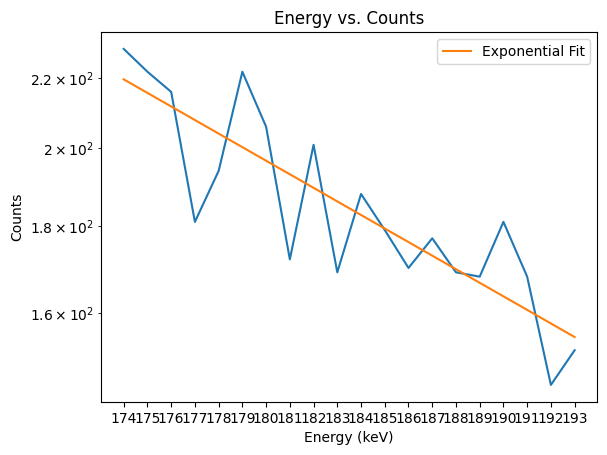

In [526]:
#Energy peak for Radon 222 is 186 keV
df_Moffit_Cs137 = df_Moffit[175: 195] #Extra points to better fit the exponential curve
df_Moffit_Cs137_gaussian = df_Moffit[gaussian_range] #The gaussian curve itself
plt.plot(df_Moffit_Cs137)

#Exponential Fit
Moffit_Cs137_index = df_Moffit_Cs137.index
Moffit_Cs137_index = np.arange(len(Moffit_Cs137_index))
Moffit_Cs137_values = df_Moffit_Cs137.values
Moffit_Cs137_values = Moffit_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)


params, covariance = curve_fit(exponential_func2, Moffit_Cs137_index, Moffit_Cs137_values)
a, b = params
plt.plot(Moffit_Cs137_index, exponential_func2(Moffit_Cs137_index, a, b), label = 'Exponential Fit')
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Energy vs. Counts')
plt.legend()
print('number of counts for 222 Radon is < 4 counts')

C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1168820048.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Moffit_Cs137 = df_Moffit[exponential_range] #Extra points to better fit the exponential curve
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1168820048.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Moffit_Cs137_gaussian = df_Moffit[gaussian_range] #The gaussian curve itself
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1168820048.py:38: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1168820048.py:63: DeprecationWa

-934.802034259076 + 574.498986340686*sqrt(pi)
definite integral = 84 counts


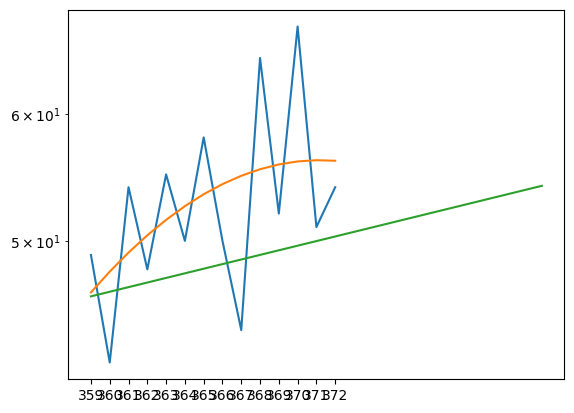

In [394]:
#Energy peak for 131 Iodine is 364 keV
exponential_range = np.arange(355, 380)
gaussian_range = np.arange(360, 374)
Moffit(exponential_range, gaussian_range)

$$\text{Waywest}$$

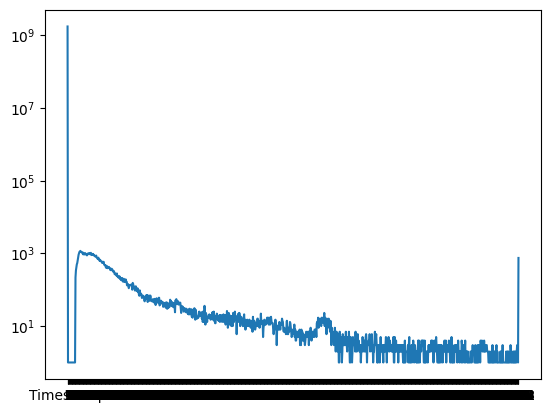

In [347]:
plt.plot(df_Waywest)
plt.yscale('log')

Activity = 24.580318197916355 Bq/min
for gaussian : amplitude = 1.4748190918749813, mean = 5.325057479172393, std = 5.77114280923191
for exponential : a = 1.234593568736295, b = 0.034097011021622874
Intersection points: [3.17049312 5.20834565]
Definite integral = -2.90283032857179 + 1.65486898779885*sqrt(pi)
Total counts for U238 is : 0 counts


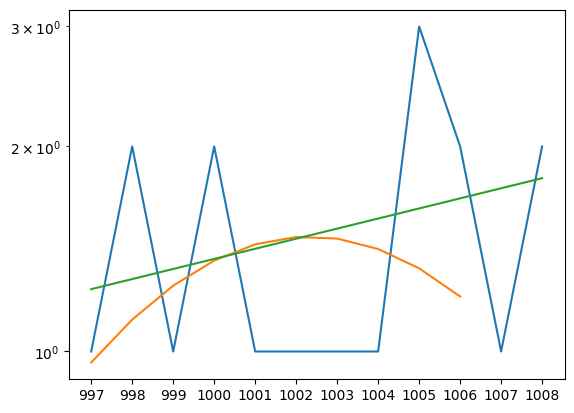

In [527]:
#Energy Peak for U238 is 1001 keV
df_Waywest_U238 = df_Waywest.iloc[998:1010] #This chunk of data is for exponential fit
df_Waywest_U238_gaussian = df_Waywest.iloc[1010:1020] #This chunk of data is for gaussian fit
plt.plot(df_Waywest_U238)
plt.yscale('log')

#Gausian Fit --> Exponential Fit --> intersection --> integration
#Gaussian Fit
Waywest_U238_values = df_Waywest_U238_gaussian.values
Waywest_U238_values = Waywest_U238_values.flatten()
Waywest_U238_index = df_Waywest_U238_gaussian.index
Waywest_U238_index = np.arange(len(Waywest_U238_values))

std = np.std(df_Waywest_U238_gaussian.values)
mean = np.mean(df_Waywest_U238_gaussian.values)

def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Waywest_U238_index, Waywest_U238_values, p0 = initial_guess)
amplitude_fit, mean_fit, stddev_fit = params

plt.plot(Waywest_U238_index, gaussian(Waywest_U238_index, amplitude_fit, mean_fit, stddev_fit))

max_value = gaussian(mean_fit, amplitude_fit, mean_fit, stddev_fit)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')

#Exponential Fit
Waywest_U238_exponential_values = df_Waywest_U238.values
Waywest_U238_exponential_values = Waywest_U238_exponential_values.flatten()
Waywest_U238_exponential_index = df_Waywest_U238.index
Waywest_U238_exponential_index = np.arange(len(Waywest_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exponential_func, Waywest_U238_exponential_index, Waywest_U238_exponential_values)
a, b = params
plt.plot(Waywest_U238_exponential_index, exponential_func(Waywest_U238_exponential_index, a, b))

#Intersection
print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
print(f'for exponential : a = {a}, b = {b}')

def f(x, amplitude_fit, mean_fit, stddev_fit):
    return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)

def g(x, a, b):
    return a * np.exp(b * x)

def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
    return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)

x_values = np.linspace(-10, 10, 1000)

sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]

intersection_points = []
for idx in sign_changes:
    x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
    intersection_points.extend(x_root)

intersection_points = np.unique(intersection_points)

print("Intersection points:", intersection_points)

#Integrate
x = symbols('x')
f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
f_exponential = a * exp(b * x)

lower_bound = intersection_points[0]
upper_bound = intersection_points[1]

definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential

print(f'Definite integral = {definite_integral}')

print(f'Total counts for U238 is : 0 counts')

Activity = 239.11539098200382 Bq/min


C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1258527773.py:40: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1258527773.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intersection_point = int(intersection_point)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\1258527773.py:64: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))


-328.490159174667 + 286.057058740923*sqrt(pi)
definite integral = 179


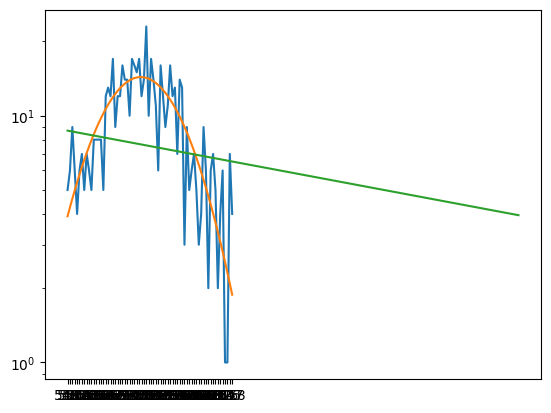

In [534]:
#Energy Peak for Cs-137 is 662 keV
df_Waywest_Cs137 = df_Waywest[510: 700] #Extra points to better fit the exponential curve
df_Waywest_Cs137_gaussian = df_Waywest[550:620] #The gaussian curve itself
plt.plot(df_Waywest_Cs137_gaussian)


#Gaussian Fit
Waywest_Cs137_gaussian_index = df_Waywest_Cs137_gaussian.index
Waywest_Cs137_gaussian_index = np.arange(len(Waywest_Cs137_gaussian_index))
Waywest_Cs137_gaussian_values = df_Waywest_Cs137_gaussian.values
Waywest_Cs137_gaussian_values = Waywest_Cs137_gaussian_values.flatten()


std = np.std(Waywest_Cs137_gaussian_values)
mean = np.mean(Waywest_Cs137_gaussian_values)


def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Waywest_Cs137_gaussian_index, Waywest_Cs137_gaussian_values, p0 = initial_guess)
amplitude, mean, std = params


plt.plot(Waywest_Cs137_gaussian_index, gaussian(Waywest_Cs137_gaussian_index, amplitude, mean, std))

max_value = gaussian(mean, amplitude, mean, std)
Activity = max_value/.06 
print(f'Activity = {Activity} Bq/min')


#Exponential Fit
Waywest_Cs137_index = df_Waywest_Cs137.index
Waywest_Cs137_index = np.arange(len(Waywest_Cs137_index))
Waywest_Cs137_values = df_Waywest_Cs137.values
Waywest_Cs137_values = Waywest_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)


params, covariance = curve_fit(exponential_func2, Waywest_Cs137_index, Waywest_Cs137_values)
a, b = params
plt.plot(Waywest_Cs137_index, exponential_func2(Waywest_Cs137_index, a, b))
plt.yscale('log')


#Intersection
def f(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


def g(x, a, b):
    return a * np.exp(-b * x)


def intersection_function(x, amplitude, mean, std, a, b):
    return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)


intersection_points = []
for i in range(len(Waywest_Cs137_index)):
    intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
    intersection_point = int(intersection_point)
    intersection_points.append(intersection_point)


intersection_points = np.array(intersection_points)
intersection_points = intersection_points[intersection_points < 100]
intersection_points = np.unique(intersection_points)


#Integration
x = symbols('x')
f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
f_exponential = a * exp(-b * x)


lower_bound = intersection_points[0]
upper_bound = intersection_points[1]


definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound)) 
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential
print(definite_integral)
print(f'definite integral = {np.ceil(definite_integral)}')


In [538]:
def Waywest(exponential_range, gaussian_range):
    #Energy Peak for Cs-137 is 662 keV
    df_Waywest_Cs137 = df_Waywest[exponential_range] #Extra points to better fit the exponential curve
    df_Waywest_Cs137_gaussian = df_Waywest[gaussian_range] #The gaussian curve itself
    plt.plot(df_Waywest_Cs137_gaussian)


    #Gaussian Fit
    Waywest_Cs137_gaussian_index = df_Waywest_Cs137_gaussian.index
    Waywest_Cs137_gaussian_index = np.arange(len(Waywest_Cs137_gaussian_index))
    Waywest_Cs137_gaussian_values = df_Waywest_Cs137_gaussian.values
    Waywest_Cs137_gaussian_values = Waywest_Cs137_gaussian_values.flatten()


    std = np.std(Waywest_Cs137_gaussian_values)
    mean = np.mean(Waywest_Cs137_gaussian_values)


    def gaussian(x, amplitude, mean, std):
        return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


    initial_guess = (1, mean, std)
    params, covariance = curve_fit(gaussian, Waywest_Cs137_gaussian_index, Waywest_Cs137_gaussian_values, p0 = initial_guess, maxfev = 1000000)
    amplitude, mean, std = params

    max_value = gaussian(mean, amplitude, mean, std)
    Activity = max_value/.06 
    print(f'Activity = {Activity} Bq/min')

    plt.plot(Waywest_Cs137_gaussian_index, gaussian(Waywest_Cs137_gaussian_index, amplitude, mean, std))


    #Exponential Fit
    Waywest_Cs137_index = df_Waywest_Cs137.index
    Waywest_Cs137_index = np.arange(len(Waywest_Cs137_index))
    Waywest_Cs137_values = df_Waywest_Cs137.values
    Waywest_Cs137_values = Waywest_Cs137_values.flatten()
    def exponential_func2(x, a, b):
        return a * np.exp(-b * x)


    params, covariance = curve_fit(exponential_func2, Waywest_Cs137_index, Waywest_Cs137_values)
    a, b = params
    plt.plot(Waywest_Cs137_index, exponential_func2(Waywest_Cs137_index, a, b))
    plt.yscale('log')


    #Intersection
    def f(x, amplitude, mean, std):
        return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


    def g(x, a, b):
        return a * np.exp(-b * x)


    def intersection_function(x, amplitude, mean, std, a, b):
        return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)


    intersection_points = []
    for i in range(len(Waywest_Cs137_index)):
        intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
        intersection_point = int(intersection_point)
        intersection_points.append(intersection_point)


    intersection_points = np.array(intersection_points)
    intersection_points = intersection_points[intersection_points < 100]
    intersection_points = np.real(intersection_points)
    intersection_points = np.unique(intersection_points)


    #Integration
    x = symbols('x')
    f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
    f_exponential = a * exp(-b * x)


    lower_bound = intersection_points[0]
    upper_bound = intersection_points[1]


    definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound)) 
    definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
    definite_integral = definite_integral_gaussian - definite_integral_exponential
    print(definite_integral)
    print(f'definite integral = {np.ceil(definite_integral)}')

C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\130953315.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Waywest_Cs137 = df_Waywest[exponential_range] #Extra points to better fit the exponential curve
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\130953315.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Waywest_Cs137_gaussian = df_Waywest[gaussian_range] #The gaussian curve itself
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\130953315.py:40: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\130953315.py:65: DeprecationWa

Activity = 1055.00919359237 Bq/min
-594.052944480029 + 348.236533098931*sqrt(pi)
definite integral = 24


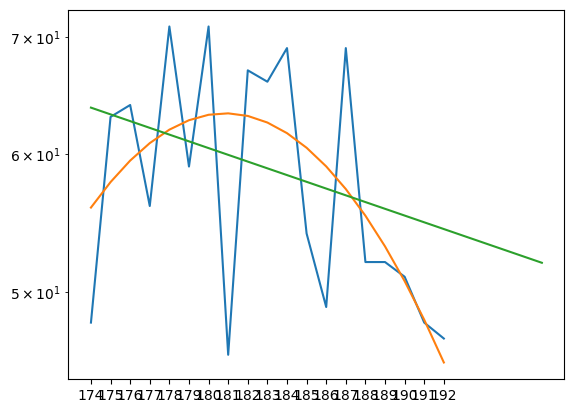

In [533]:
#Energy Peak for 222 Radon is 186 keV
exponential_range = np.arange(173, 197)
gaussian_range = np.arange(175, 194)
Waywest(exponential_range, gaussian_range)

C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\130953315.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Waywest_Cs137 = df_Waywest[exponential_range] #Extra points to better fit the exponential curve
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\130953315.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Waywest_Cs137_gaussian = df_Waywest[gaussian_range] #The gaussian curve itself
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\130953315.py:40: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_12736\130953315.py:65: DeprecationWa

Activity = 283.1611268194717 Bq/min
-129.403556949637 + 75.3105138313548*sqrt(pi)
definite integral = 5


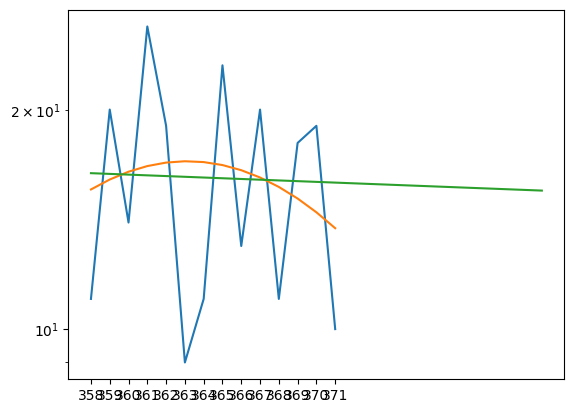

In [545]:
#Energy peak for 131 Iodine is 364 keV
exponential_range = np.arange(355, 380)
gaussian_range = np.arange(359, 373)
Waywest(exponential_range, gaussian_range)